# Python biblioteke za rad sa podacima (Pandas)

###### Studenti:
    Andrija Nicić 2020/0176
    Mihajlo Branković 2020/0391
    Stanislav Čeman 2020/0415

## Uvod
U ovom radu prikazujemo neke osnovne primene python biblioteke Pandas. Koristićemo bazu podataka pacijenata za kontrolu dijabetesa, koju provlačimo kroz tri faze: Prepravljanje, Vizuelizacija, i Učenje.


Baza je preuzeta sa sajta: www.kaggle.com

## Prepravljanje

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df=pd.read_csv("C:/Python/Python38/Scripts/baze/diabetes.csv")

df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Prvo da proverimo kakva je ovo baza podataka, tj sta sve ona ima. I koje su neke njene osnovne karakteristike.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Sada proveravamo prazna polja

In [4]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Nema nepostojećih vrednosti ali možemo da vidimo da u nekim kolonama poput 'Insulin' i 'SkinThickness' imamo neke nule što nema smisla pa hajde da pomoću nekog grafika vidimo gde sve imamo nule u bazi.

<AxesSubplot: >

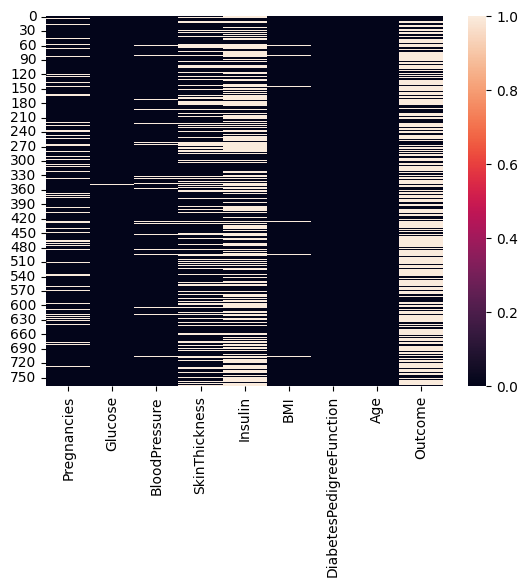

In [6]:
sns.heatmap(df==0)

Vidimo da u nekoliko kolona imamo 0 gde to uopšte nema smisla, tako da umesto da se rešavamo tih kolona u potpunosti, računaćemo mediane i stavljati te vrednosti. E sad da bi to bilo "fer", računaćemo mediane po starosnoj grupi pa hajde prvo da vidimo kolko ima koga

<AxesSubplot: xlabel='Age', ylabel='count'>

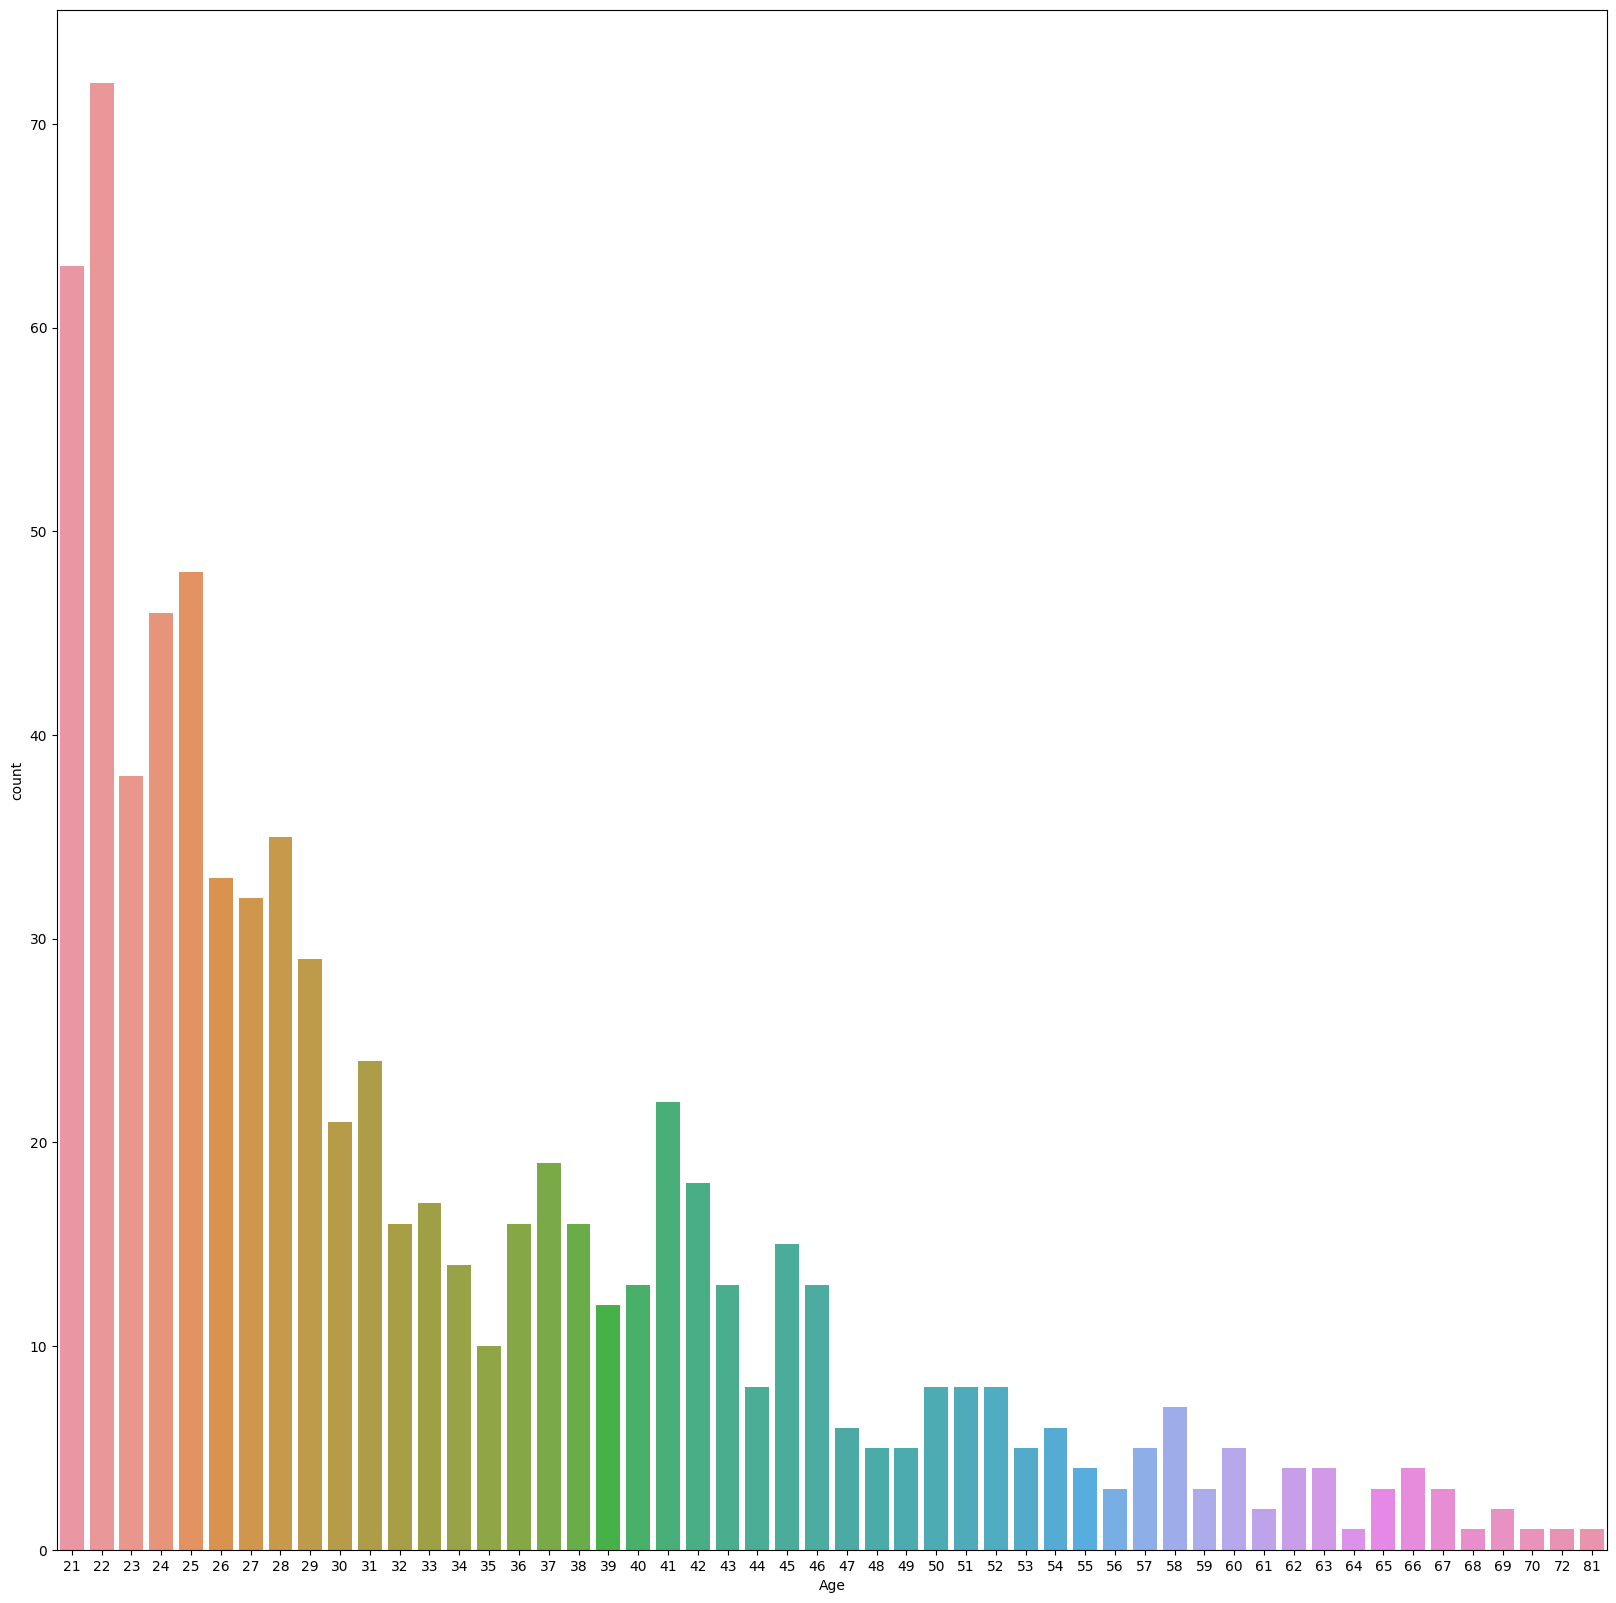

In [7]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
sns.countplot(x='Age',data=df)

Počto ih ima ubedljivo najvise u grupi izmedju 20 i 30 godina, njih ćemo podeliti u dve grupe (manje i vise od 25). Ostale grupe će da budu od 30 do 40,od 40 do 50 i 50+)


##### Kolona 'Glucose'

In [8]:

gluc = np.array([

(df["Glucose"].loc[(df["Glucose"]!=0)& (df["Age"]<25)]).median()
,(df["Glucose"].loc[(df["Glucose"]!=0)& (df["Age"]<30)&(df["Age"]>=25)]).median()
,(df["Glucose"].loc[(df["Glucose"]!=0)& (df["Age"]<40)&(df["Age"]>=30)]).median()
,(df["Glucose"].loc[(df["Glucose"]!=0)& (df["Age"]<50)&(df["Age"]>=40)]).median()
,(df["Glucose"].loc[(df["Glucose"]!=0)& (df["Age"]>=50)]).median()])

gluc

array([108., 112., 122., 123., 138.])

##### Kolona 'BloodPressure'

In [9]:

bp = np.array([

(df["BloodPressure"].loc[(df["BloodPressure"]!=0)& (df["Age"]<25)]).median()
,(df["BloodPressure"].loc[(df["BloodPressure"]!=0)& (df["Age"]<30)&(df["Age"]>=25)]).median()
,(df["BloodPressure"].loc[(df["BloodPressure"]!=0)& (df["Age"]<40)&(df["Age"]>=30)]).median()
,(df["BloodPressure"].loc[(df["BloodPressure"]!=0)& (df["Age"]<50)&(df["Age"]>=40)]).median()
,(df["BloodPressure"].loc[(df["BloodPressure"]!=0)& (df["Age"]>=50)]).median()])

bp

array([65.5, 70. , 74. , 78. , 78. ])

##### Kolona 'SkinThicnkess'

In [10]:

st = np.array([

(df["SkinThickness"].loc[(df["SkinThickness"]!=0)& (df["Age"]<25)]).median()
,(df["SkinThickness"].loc[(df["SkinThickness"]!=0)& (df["Age"]<30)&(df["Age"]>=25)]).median()
,(df["SkinThickness"].loc[(df["SkinThickness"]!=0)& (df["Age"]<40)&(df["Age"]>=30)]).median()
,(df["SkinThickness"].loc[(df["SkinThickness"]!=0)& (df["Age"]<50)&(df["Age"]>=40)]).median()
,(df["SkinThickness"].loc[(df["SkinThickness"]!=0)& (df["Age"]>=50)]).median()])

st

array([25., 30., 32., 31., 29.])

##### Kolona 'Insulin'

In [11]:

ins = np.array([

(df["Insulin"].loc[(df["Insulin"]!=0)& (df["Age"]<25)]).median()
,(df["Insulin"].loc[(df["Insulin"]!=0)& (df["Age"]<30)&(df["Age"]>=25)]).median()
,(df["Insulin"].loc[(df["Insulin"]!=0)& (df["Age"]<40)&(df["Age"]>=30)]).median()
,(df["Insulin"].loc[(df["Insulin"]!=0)& (df["Age"]<50)&(df["Age"]>=40)]).median()
,(df["Insulin"].loc[(df["Insulin"]!=0)& (df["Age"]>=50)]).median()])

ins

array([100., 110., 140., 131., 191.])

##### Kolona 'BMI'

In [12]:

bmi = np.array([

(df["BMI"].loc[(df["BMI"]!=0)& (df["Age"]<25)]).median()
,(df["BMI"].loc[(df["BMI"]!=0)& (df["Age"]<30)&(df["Age"]>=25)]).median()
,(df["BMI"].loc[(df["BMI"]!=0)& (df["Age"]<40)&(df["Age"]>=30)]).median()
,(df["BMI"].loc[(df["BMI"]!=0)& (df["Age"]<50)&(df["Age"]>=40)]).median()
,(df["BMI"].loc[(df["BMI"]!=0)& (df["Age"]>=50)]).median()])

bmi

array([30.1 , 33.3 , 32.  , 33.95, 30.5 ])

Sada kada imamo sve podatke koji su nam potrebni, menjamo sve 0 sa odgovarajućim vrednostima.

In [13]:



df["Glucose"].mask((df["Glucose"]==0)&(df["Age"]<25),gluc[0],True)
df["Glucose"].mask((df["Glucose"]==0)& (df["Age"]<30)&(df["Age"]>=25),gluc[1],True)
df["Glucose"].mask((df["Glucose"]==0)& (df["Age"]<40)&(df["Age"]>=30),gluc[2],True)
df["Glucose"].mask((df["Glucose"]==0)& (df["Age"]<50)&(df["Age"]>=40),gluc[3],True)
df["Glucose"].mask((df["Glucose"]==0)& (df["Age"]>=50),gluc[4],True)


df["BloodPressure"].mask((df["BloodPressure"]==0)&(df["Age"]<25),bp[0],True)
df["BloodPressure"].mask((df["BloodPressure"]==0)& (df["Age"]<30)&(df["Age"]>=25),bp[1],True)
df["BloodPressure"].mask((df["BloodPressure"]==0)& (df["Age"]<40)&(df["Age"]>=30),bp[2],True)
df["BloodPressure"].mask((df["BloodPressure"]==0)& (df["Age"]<50)&(df["Age"]>=40),bp[3],True)
df["BloodPressure"].mask((df["BloodPressure"]==0)& (df["Age"]>=50),bp[4],True)


df["SkinThickness"].mask((df["SkinThickness"]==0)&(df["Age"]<25),st[0],True)
df["SkinThickness"].mask((df["SkinThickness"]==0)& (df["Age"]<30)&(df["Age"]>=25),st[1],True)
df["SkinThickness"].mask((df["SkinThickness"]==0)& (df["Age"]<40)&(df["Age"]>=30),st[2],True)
df["SkinThickness"].mask((df["SkinThickness"]==0)& (df["Age"]<50)&(df["Age"]>=40),st[3],True)
df["SkinThickness"].mask((df["SkinThickness"]==0)& (df["Age"]>=50),st[4],True)


df["Insulin"].mask((df["Insulin"]==0)&(df["Age"]<25),ins[0],True)
df["Insulin"].mask((df["Insulin"]==0)& (df["Age"]<30)&(df["Age"]>=25),ins[1],True)
df["Insulin"].mask((df["Insulin"]==0)& (df["Age"]<40)&(df["Age"]>=30),ins[2],True)
df["Insulin"].mask((df["Insulin"]==0)& (df["Age"]<50)&(df["Age"]>=40),ins[3],True)
df["Insulin"].mask((df["Insulin"]==0)& (df["Age"]>=50),ins[4],True)


df["BMI"].mask((df["BMI"]==0)&(df["Age"]<25),bmi[0],True)
df["BMI"].mask((df["BMI"]==0)& (df["Age"]<30)&(df["Age"]>=25),bmi[1],True)
df["BMI"].mask((df["BMI"]==0)& (df["Age"]<40)&(df["Age"]>=30),bmi[2],True)
df["BMI"].mask((df["BMI"]==0)& (df["Age"]<50)&(df["Age"]>=40),bmi[3],True)
df["BMI"].mask((df["BMI"]==0)& (df["Age"]>=50),bmi[4],True)


Sad gledamo dal idalje ima nula

<AxesSubplot: >

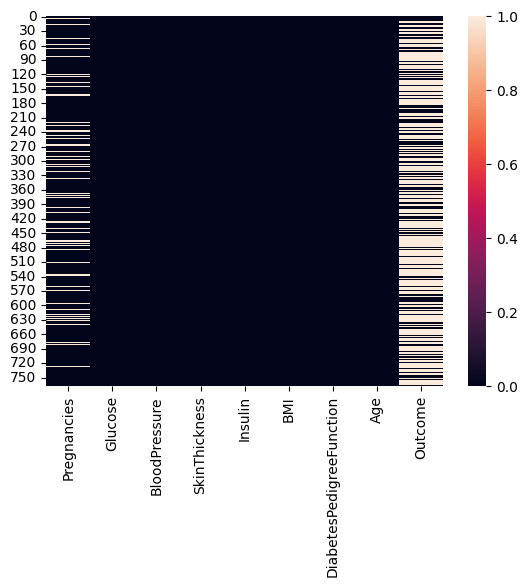

In [14]:
sns.heatmap(df==0)

Nula više nema. Sada da proverimo da li su su se zamenile se dobrim vrednostima.

In [15]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35      191  33.6   
1              1       85           66.0             29      140  26.6   
2              8      183           64.0             32      140  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27      110  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0             31      131  30.1   
767            1       93           70.0             31      100  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Sve je na mestu! Da vidimo kako opis baze izgleda sada.

In [16]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.635417      72.352214      29.316406  143.889323   
std       3.369578   30.447979      12.134082       8.882700   88.335688   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  100.000000   
50%       3.000000  117.000000      72.000000      30.000000  131.000000   
75%       6.000000  140.250000      80.000000      32.000000  165.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.435547                  0.471876   33.240885    0.348958  
std      6.879158                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000



Sada dodajemo nove kolone. Prvo ćemo da dodamo kolonu BMI_Status, koji će na osnovu vrednosti BMI da dobije vrednost:
######    -Underweight BMI<18.5
######    -Normal 18.5<=BMI<25
######    -Overweight 25<=BMI<30
######    -Obese BMI>=30

In [17]:
df.loc[df["BMI"]>=30,"BMI_Status"]="Obese"
df.loc[(df["BMI"]<30)&(df["BMI"]>=25),"BMI_Status"]="Overweight"
df.loc[(df["BMI"]<25)&(df["BMI"]>=18.5),"BMI_Status"]="Normal"
df.loc[df["BMI"]<18.5,"BMI_Status"]="Underweight"

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35      191  33.6   
1              1       85           66.0             29      140  26.6   
2              8      183           64.0             32      140  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27      110  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0             31      131  30.1   
767            1       93           70.0             31      100  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BMI_Status  
0                       0.627   50        1       Obese  
1                       0.351   31        0  Overweight  
2                       0.672   32        1      Normal  
3                       0.167   21        0  Overweight  
4                       2.288   33        1       Obese  
..                        ...  ...      ...         ...  
763                     0.171   63        0       Obese  
764                     0.340   27        0       Obese  
765                     0.245   30        0  Overweight  
766                     0.349   47        1       Obese  
767                     0.315   23        0       Obese  

[768 rows x 10 columns]

Hajde sad da prebrojimo kolko koga ima

<AxesSubplot: xlabel='BMI_Status', ylabel='count'>

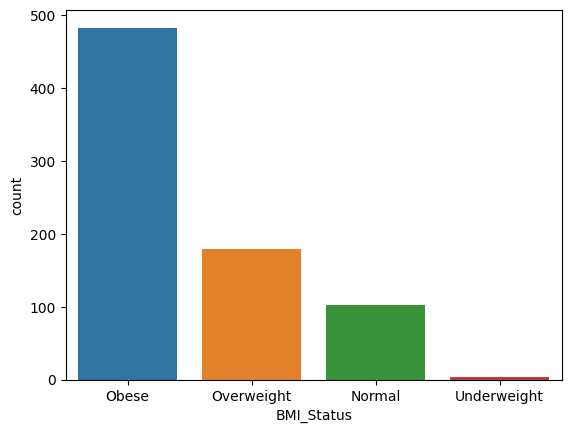

In [18]:
sns.countplot(x='BMI_Status',data=df)


Sad dodajemo kolonu za kategorije nivoa krvnog pritiska ('Blood Pressure') i koristićemo sledeću podelu:
###### -Normal/Elevated za <=80
###### -Hypertension Stage 1 za 80< BloodPressure <=89
###### -Hypertension Stage 2 za >89

In [19]:
df.loc[df["BloodPressure"]>89,"BP_Status"]="Hypertension Stage 2"
df.loc[(df["BloodPressure"]<=89)&(df["BloodPressure"]>80),"BP_Status"]="Hypertension Stage 1"
df.loc[df["BloodPressure"]<=80,"BP_Status"]="Normal/Elevated"

df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35      191  33.6   
1              1       85           66.0             29      140  26.6   
2              8      183           64.0             32      140  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27      110  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0             31      131  30.1   
767            1       93           70.0             31      100  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BMI_Status        BP_Status  
0                       0.627   50        1       Obese  Normal/Elevated  
1                       0.351   31        0  Overweight  Normal/Elevated  
2                       0.672   32        1      Normal  Normal/Elevated  
3                       0.167   21        0  Overweight  Normal/Elevated  
4                       2.288   33        1       Obese  Normal/Elevated  
..                        ...  ...      ...         ...              ...  
763                     0.171   63        0       Obese  Normal/Elevated  
764                     0.340   27        0       Obese  Normal/Elevated  
765                     0.245   30        0  Overweight  Normal/Elevated  
766                     0.349   47        1       Obese  Normal/Elevated  
767                     0.315   23        0       Obese  Normal/Elevated  

[768 rows x 11 columns]

<AxesSubplot: xlabel='BP_Status', ylabel='count'>

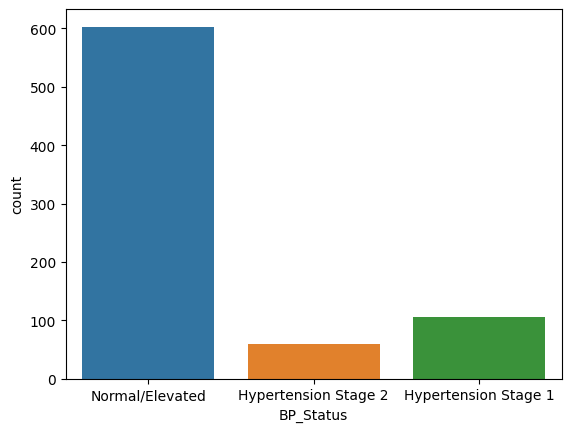

In [20]:
sns.countplot(x='BP_Status',data=df)

Sad pošto kolona 'Outcome',nakon dodavanja nove dve kolone, se nalazi na bezveze mestu, pomerićemo je na kraj.

In [21]:
cols= list(df.columns.values)
df= df[cols[0:8]+[cols[-2]]+[cols[-1]]+[cols[-3]]]
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148           72.0             35      191  33.6   
1              1       85           66.0             29      140  26.6   
2              8      183           64.0             32      140  23.3   
3              1       89           66.0             23       94  28.1   
4              0      137           40.0             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101           76.0             48      180  32.9   
764            2      122           70.0             27      110  36.8   
765            5      121           72.0             23      112  26.2   
766            1      126           60.0             31      131  30.1   
767            1       93           70.0             31      100  30.4   

     DiabetesPedigreeFunction  Age  BMI_Status        BP_Status  Outcome  
0                       0.627   50       Obese  Normal/Elevated        1  
1                       0.351   31  Overweight  Normal/Elevated        0  
2                       0.672   32      Normal  Normal/Elevated        1  
3                       0.167   21  Overweight  Normal/Elevated        0  
4                       2.288   33       Obese  Normal/Elevated        1  
..                        ...  ...         ...              ...      ...  
763                     0.171   63       Obese  Normal/Elevated        0  
764                     0.340   27       Obese  Normal/Elevated        0  
765                     0.245   30  Overweight  Normal/Elevated        0  
766                     0.349   47       Obese  Normal/Elevated        1  
767                     0.315   23       Obese  Normal/Elevated        0  

[768 rows x 11 columns]

## Vizuelicacija

Nakon sređivanja baze podataka, možemo pristupiti različitim metodama vizualizacije njenih podataka. Biblioteke koje smo koristili su matplotlib, seaborn, i plotly. 


Pie chart uzorka populacije u zavisnosti od ishoda dijabetesa.

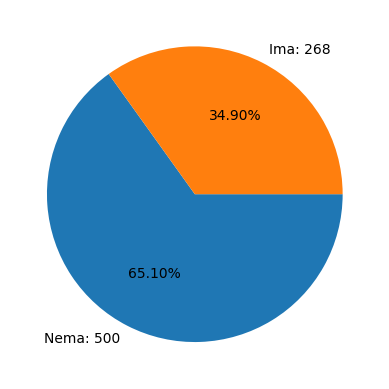

In [22]:
ima = "Ima: "+ str((df['Outcome']==1).sum())
nema = "Nema: "+ str((df['Outcome']==0).sum())

plt.pie(data=df["Outcome"].value_counts().reset_index(), x= "Outcome",  autopct='%.2f%%', labels=[nema,ima], counterclock = False, pctdistance = 0.6)
plt.show()

Box graf sa brojem trudnoce sa ishodom

[Text(0, 0, '0'), Text(1, 0, '1')]

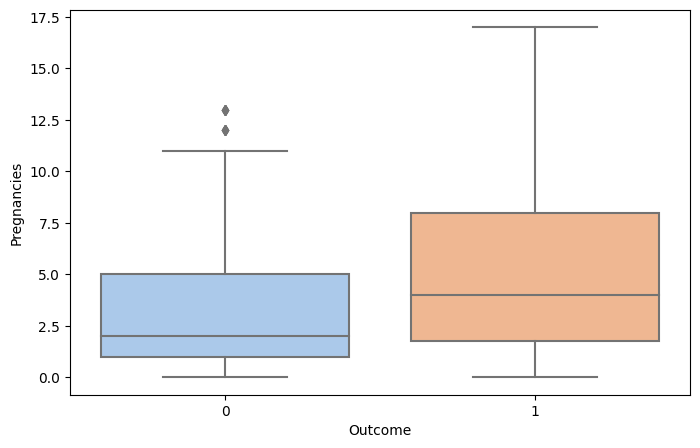

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df, palette='pastel').set_xticklabels(['0', '1'])

Histogram trudnoća

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

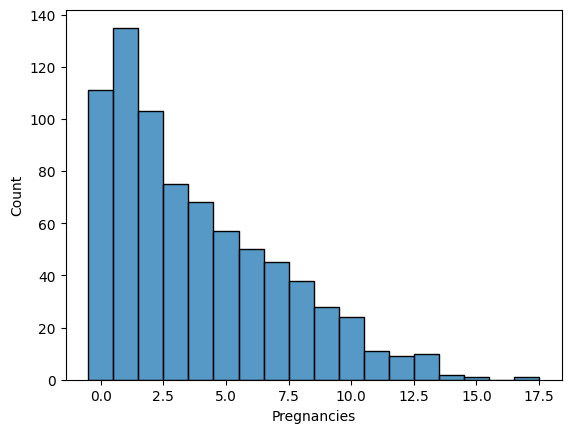

In [24]:
sns.histplot(data=df["Pregnancies"], discrete=True)

Graf dijagrama rasprsenosti sa distribucijom parametara

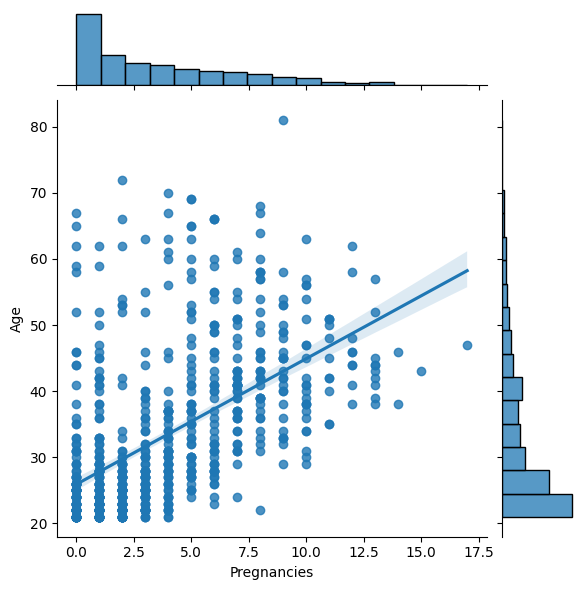

In [25]:
g= sns.JointGrid(y="Age",x="Pregnancies",data=df)
g.plot(sns.regplot,sns.histplot);

Stubasti dijagrami parametara sa ishodom dijabetesa

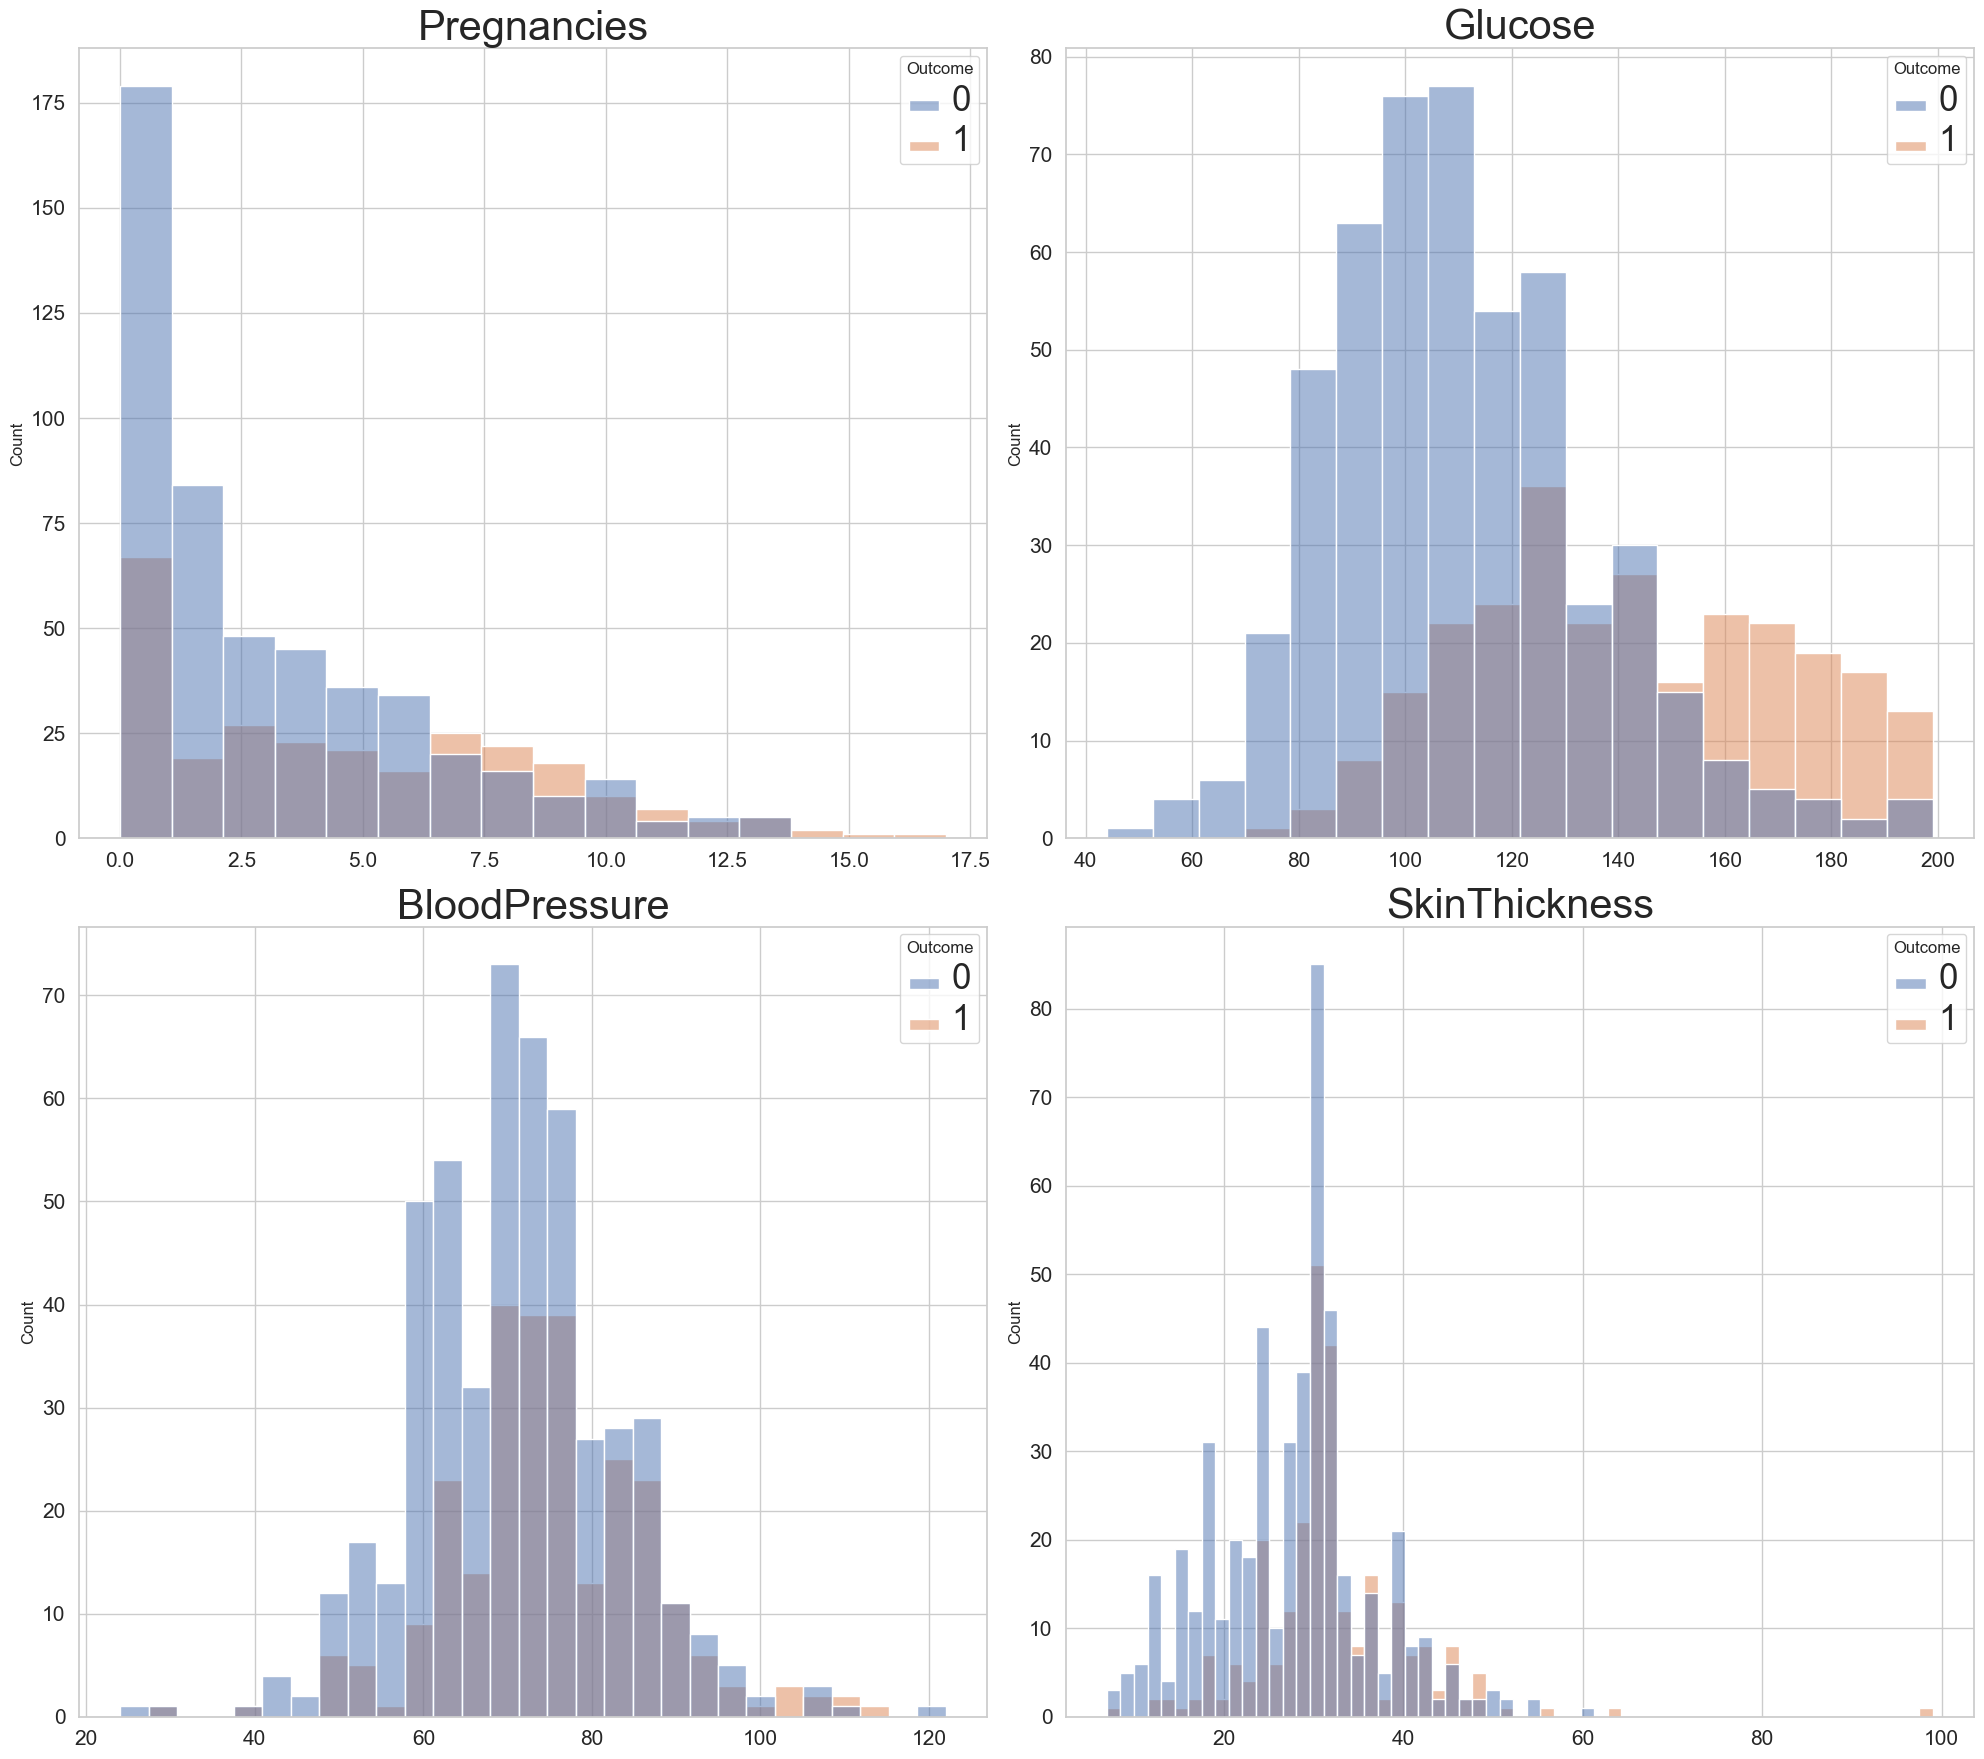

In [26]:
plt.figure(figsize=(20, 35))
sns.set(style='whitegrid')
sns.diverging_palette(200, 30, l=65, center="dark", as_cmap=True)
plotnumber = 1
 
for feature in df.columns[:4]:
    ax = plt.subplot(4, 2, plotnumber)
    ax = sns.histplot(x = feature, hue = 'Outcome', data = df)
    plt.setp(ax.get_legend().get_texts(), fontsize='25') 
    
    plt.xlabel("", size = 30)
    plt.title(feature, size = 30)
    plt.xticks(size = 15)
    ax.set_ylabel('Count')
    plt.yticks(size = 15)
    plotnumber += 1
    plt.tight_layout()
    ;

Pie chart BMI Statusa uzorka stanovnistva

In [27]:
fig = px.pie(data_frame=df, names="BMI_Status", hole= .15, title = "BMI Status", labels = {"aaa":"BMI_Status"}, hover_data=["BMI_Status"])
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()

Box grafik BMI statusa sa krvnim pristiskom

In [28]:
px.box(data_frame=df, y="BloodPressure", x = "BMI_Status", title= "BMIS/BP")

3D dijagram rasprsenosti

In [29]:
px.scatter_3d(data_frame=df,x = "Age" ,  y = "BMI", z = "Pregnancies", title = "3D plot", color="Outcome")

<AxesSubplot: xlabel='BloodPressure', ylabel='Outcome'>

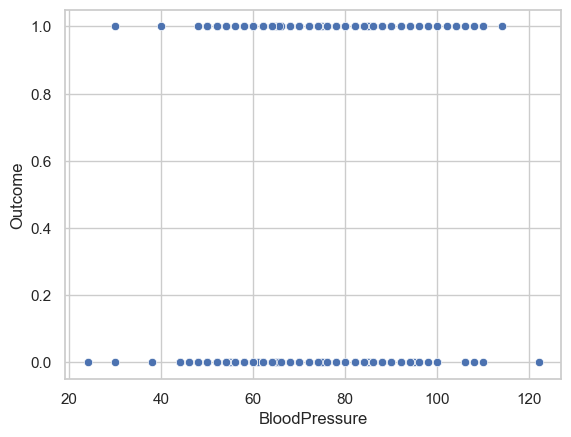

In [30]:
sns.scatterplot(data=df,x = df["BloodPressure"], y = df["Outcome"])

<AxesSubplot: xlabel='Glucose', ylabel='Outcome'>

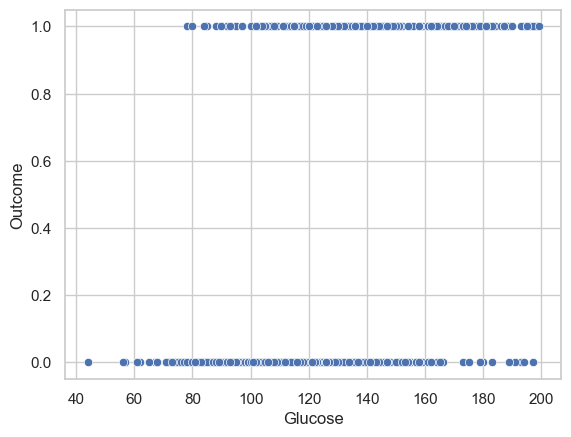

In [31]:
sns.scatterplot(data=df,x = df["Glucose"], y = df["Outcome"])

Pairplot svih parametara medjusobno

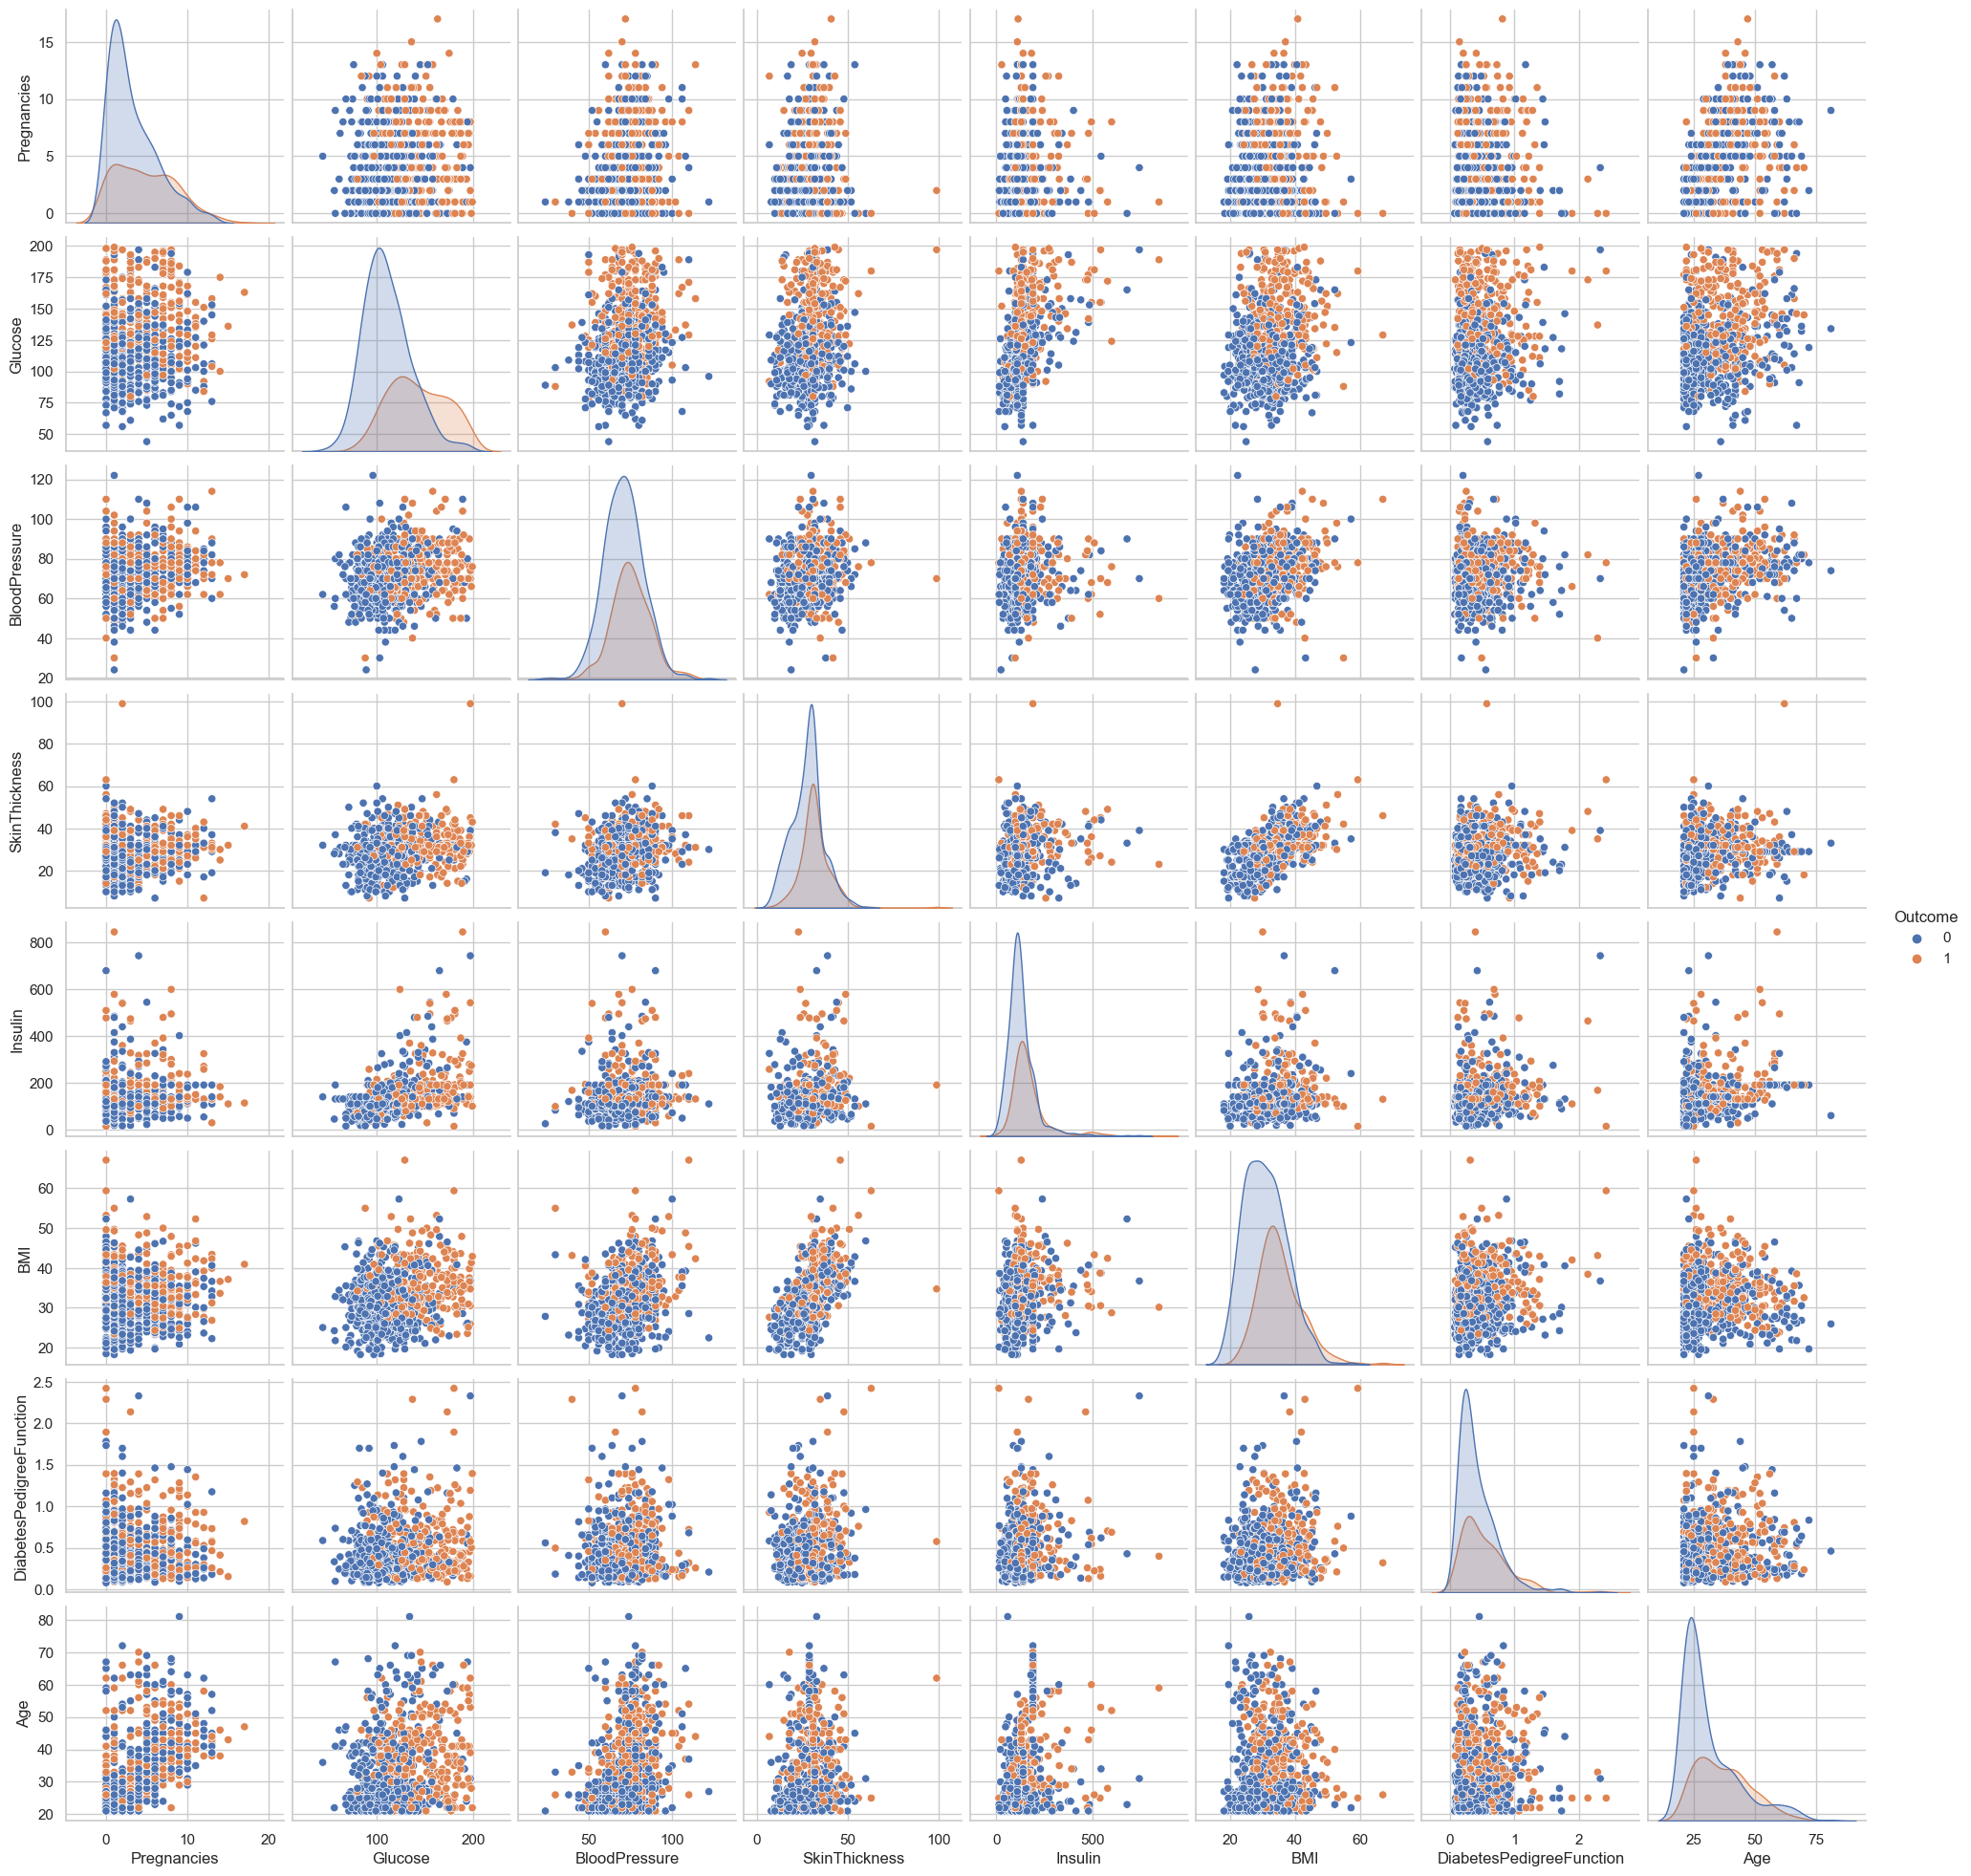

In [32]:
sns.pairplot(df, hue="Outcome")

Matrica korelacije parametara

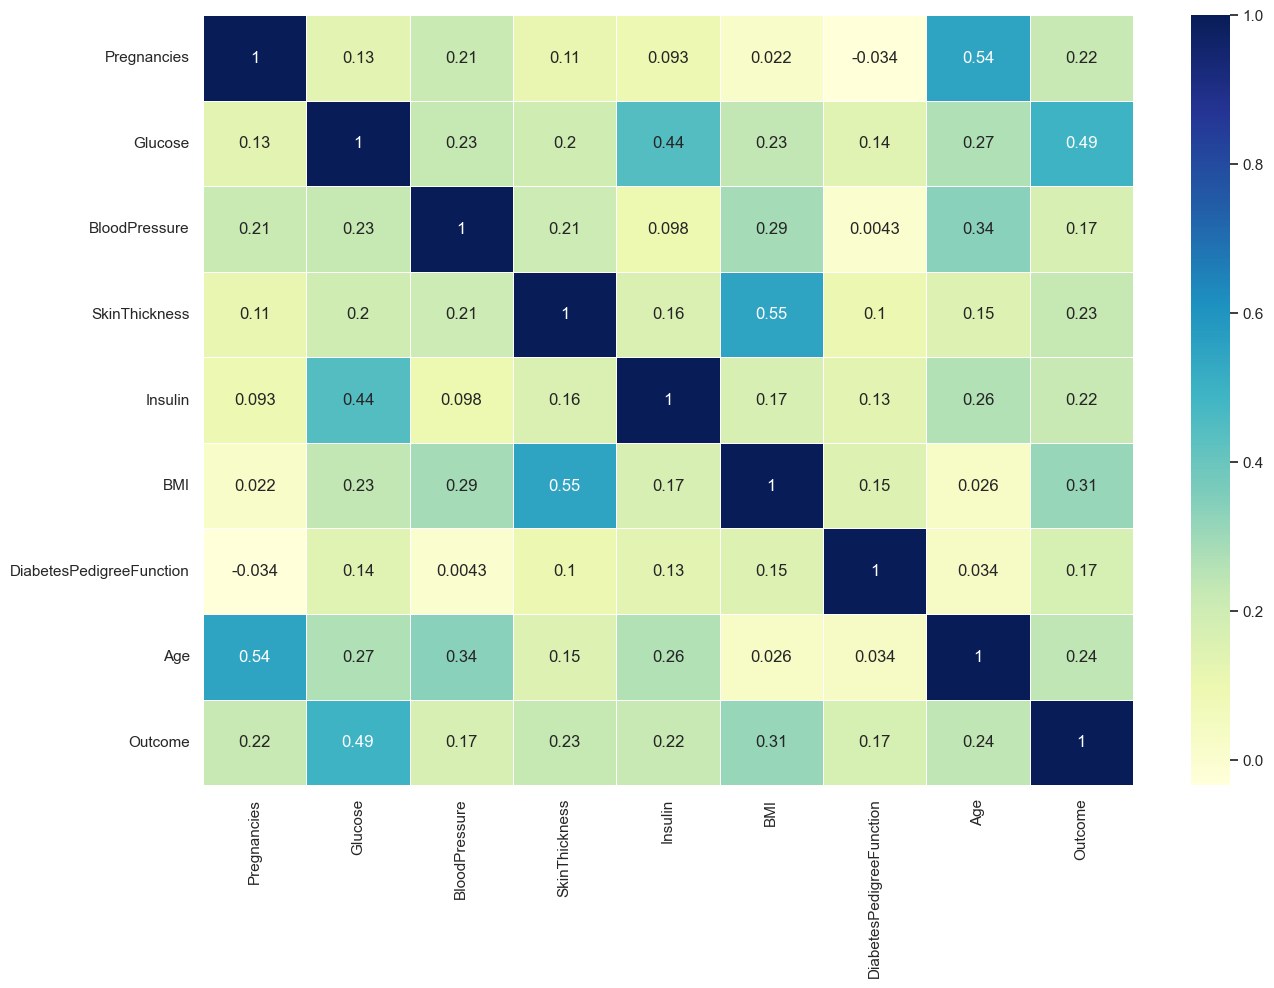

In [33]:
corr = df.corr()
hm = plt.subplots(figsize = (15, 10))

hm = sns.heatmap(corr, annot=True, linewidths= 0.5,  cmap="YlGnBu")


## Učenje i predviđanje 



### Regresija

Regresija je algoritam supervised learning-a, što znači da mi naš sistem "treniramo" uparivanjem ulaza sa njegovom vrednošću na izlazu. Regresija u opštem slučaju , za izlazne podatke smatra bilo kakav beskonačan skup. U našem slučaju , koristimo logističku regresiju, koja vraca vrednosti ili 0 ili 1. Za naš primer, smatraćemo 0 za osobu bez, a 1 za osobu sa dijabetesom.

In [34]:
df1 = df
df=df.drop(['BMI_Status','BP_Status'],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pom=df.drop(['Outcome'],axis=1)


In [35]:
model= LogisticRegression(max_iter=1000)
X_train,X_test,y_train,y_test=train_test_split(pom,df.Outcome,train_size=0.75)

In [36]:
#X_test

In [37]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_predict = model.predict(X_test)

In [39]:
model.score(X_test,y_test)

0.7916666666666666

<AxesSubplot: >

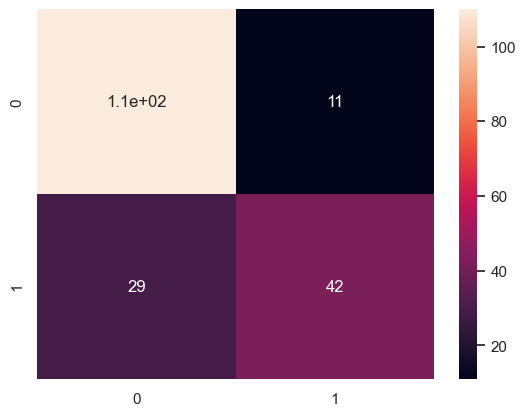

In [40]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(cf_matrix, annot = True)

In [41]:
pom=pom.drop(['Insulin','SkinThickness'],axis=1)
model= LogisticRegression(max_iter=1000)
X_train,X_test,y_train,y_test=train_test_split(pom,df.Outcome,train_size=0.75)

In [42]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [43]:
model.score(X_test,y_test)

0.765625

<AxesSubplot: >

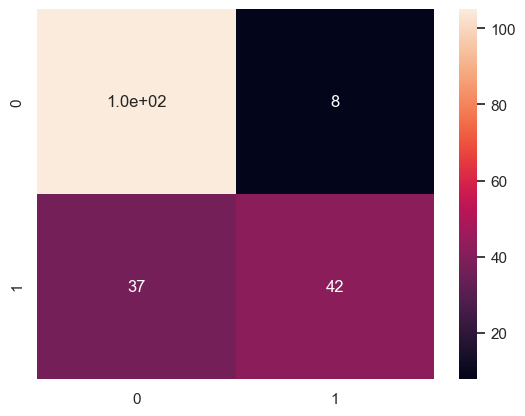

In [44]:
cf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(cf_matrix, annot = True)

In [45]:
preg_col= df[["Pregnancies"]]
gluc_col= df[["Glucose"]]
bp_col= df[["BloodPressure"]]

model= LogisticRegression(max_iter=1000)
X_train,X_test,y_train,y_test=train_test_split(gluc_col,df.Outcome,train_size=0.75)

In [46]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [47]:
y_predict = model.predict(X_test)
gluc_score = model.score(X_test,y_test)
gluc_score

0.7760416666666666

<AxesSubplot: >

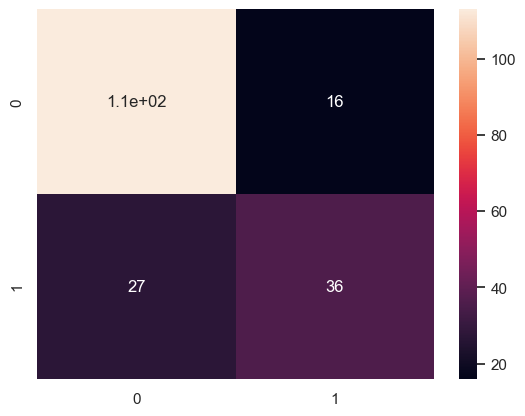

In [48]:
cf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(cf_matrix,annot = True)

Ova vrednost se slaže sa činjenicom da je korelacija glukoze i dijabetesa najveća --> skoro samo na osnovu glukoze možemo zaključiti sa tačnošću 70% da li neko ima dijabetes ili ne. 

###  Stablo odlučivanja

Stablo odlučivanja je još jedan algoritam supervised learning-a, koji se umesto regresijom služi klasifikacijom, tj. Skup ulaznih i izlaznih vrednosti razdvaja u klase ili kategorije, na osnovu kojih može da pretpostavi nepoznate ulazne podatke.

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = 5, min_samples_leaf = 1)
X_train,X_test,y_train,y_test=train_test_split(pom,df.Outcome,train_size=0.75)

In [50]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [51]:
tree_predict = tree_classifier.predict(X_test)
tree_predict

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [52]:
tree_score = tree_classifier.score(X_test,y_test)
tree_score

0.7395833333333334

<AxesSubplot: >

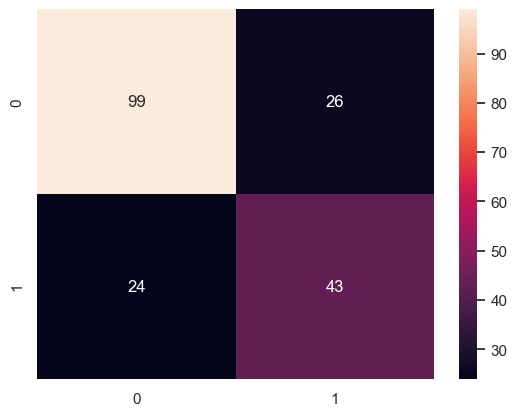

In [53]:
cf_matrix = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf_matrix,annot = True)

Vizuelizacija kreiranog stabla: 
    Polja narandžaste boje indikuju na klasu O , koja predstavlja osobe BEZ dijabetesa;
    Polja plave boje indikuju na klasu P , koja predstavlja osobe SA dijabetesom.
    Sto je tamnija boja, to je algoritam vise siguran u predvidjeni rezultat.

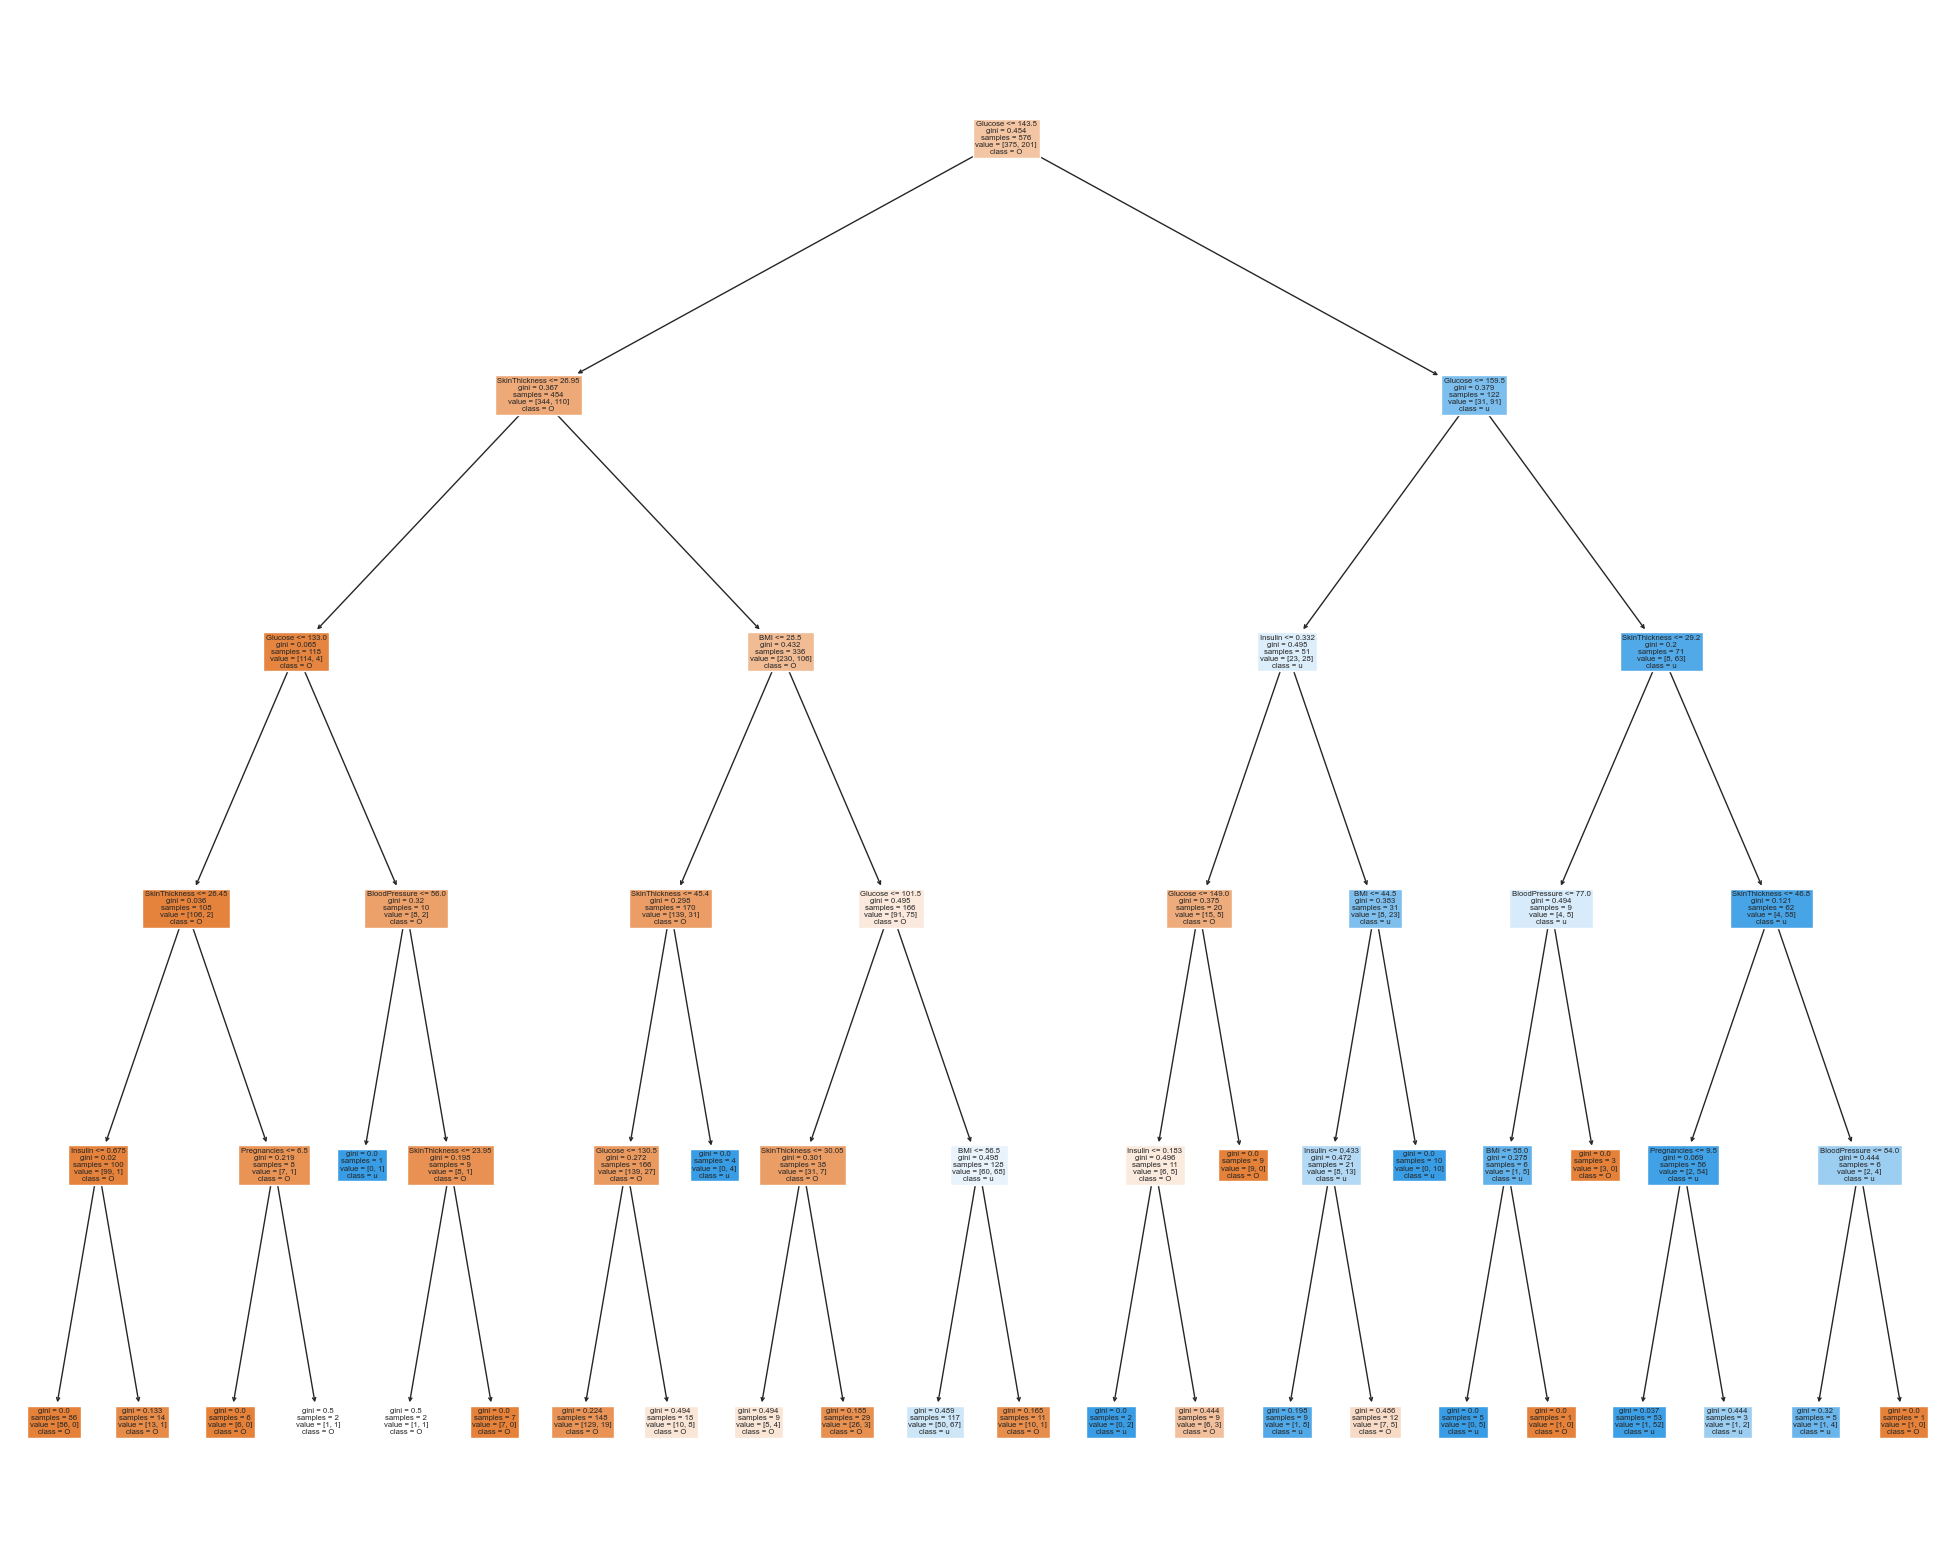

In [54]:
cols = df.columns
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_classifier, 
                   feature_names=cols[:-1],  
                   class_names=cols[-1],
                   filled=True)

Vrlo nestabilna rešenja sklona promenama. U to ime uvodimo Random forest, koja grupiše i usrednjava više stabla odlučivanja

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(n_estimators = 100)
X_train,X_test,y_train,y_test=train_test_split(pom,df.Outcome,train_size=0.75)

In [56]:
forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
forest_predict = forest_classifier.predict(X_test)
forest_score = forest_classifier.score(X_test,y_test)
forest_score

0.8072916666666666

<AxesSubplot: >

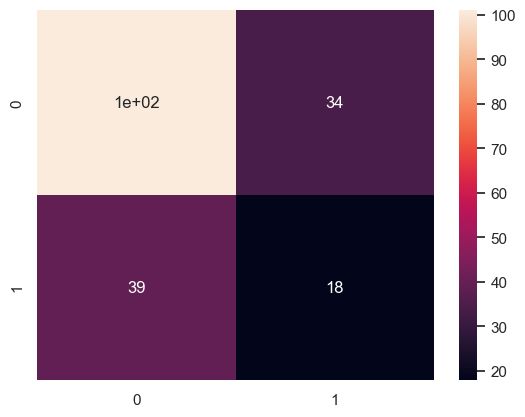

In [58]:
cf_matrix = confusion_matrix(y_test,y_predict)
sns.heatmap(cf_matrix,annot = True)

Vizualizujmo jedno stablo iz date šume. Treba napomenuti da sada očekujemo stablo vece dubine, jer nismo ograničili dubinu stabla kao u prethodnom slučaju.

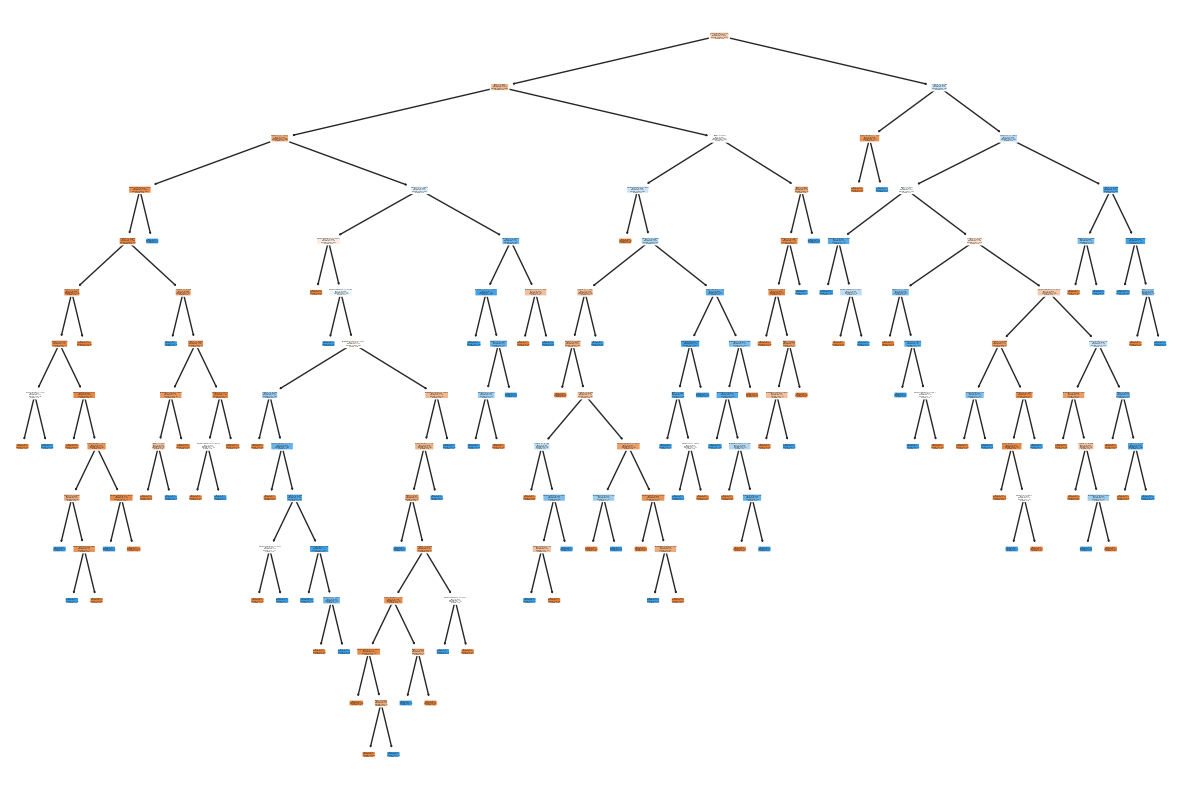

In [59]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(forest_classifier.estimators_[2], 
          feature_names=cols[:-1],
          class_names=cols[-1], 
          filled=True, impurity=True, 
          rounded=True) # drugo stablo iz sume

## Literatura:
    w3schools.com
    medium.com
    towardsdatascience.com
    kaggle.com